In [2]:
# Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

In [22]:
# A general linear function
def Func(x, w, b):
    return (w * x) + b

# The sigmoid function:
def Sigmoid(inp):
    return 1 / (1 + np.exp(-inp))

def Loss(w, b, y, x):
    yh = Sigmoid(Func(x, w, b))
    #yh = yhat is the prediction
    loss = (-y * math.log(yh)) - ((1 - y) * math.log(1 - yh))
    return loss

def ComputeCost(w, b):
    err = 0
    for i in range(n):
        err += Loss(w, b, yData[i], xData[i])
    err = err / n
    return err

# Gradient of Cost with respect to w
def ComputeGradientW(w, b):
    grad = np.dot(Sigmoid(Func(xData, w, b)) - yData, xData)
    return grad / n

# Gradient of cost with respect to b    
def ComputeGradientB(w, b):
    grad = np.dot(Sigmoid(Func(xData, w, b)) - yData, np.ones(n, dtype = np.float32))
    return grad / n

In [23]:
# Function to perform Gradient Descent

def GradientDescent(percErr):
    w = 1
    b = 1
    i = 0
    while 1:
        i += 1
        j = ComputeCost(w, b)
        w1 = w - (a_w * ComputeGradientW(w, b))
        b1 = b - (a_b * ComputeGradientB(w, b))
        w = w1
        b = b1
        j1 = ComputeCost(w, b)
        percChange = (j - j1) / (100 * j)
        if i % 10 == 1:
            # Print % change every 10th iteration - increase number to avoid message flooding
            clear_output(wait=False)
            print(percChange)
        if percChange < percErr:
            break
    print(w, b)
    return w, b

In [54]:
# Settings
n = 50           # Number of data points

xLims = (0, 3)  # Lowest and highest data point's x value
target_w = 5      # Sigmoid generator function's w & b
target_b = -7

percSat = 1e-8    # Stop learning when percentage change between consecutive updates goes lesser than this
a_w = 1e-2         # Learning rate. Optionally have different rates for W and B
a_b = a_w#5e-2

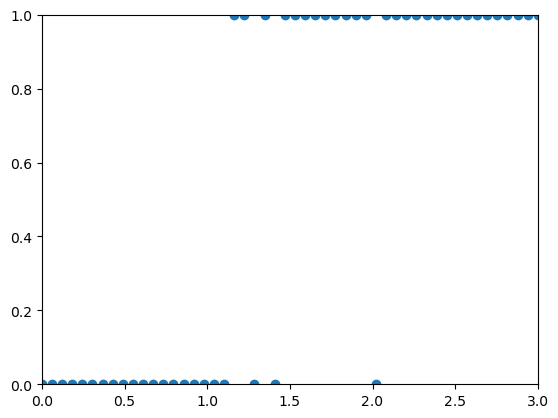

In [56]:
# Generate random data
GEN = np.random.default_rng(seed = None)
xData = np.linspace(xLims[0], xLims[1], num = n, endpoint = True, dtype = np.float32)
yData = GEN.random(size = n, dtype = np.float32)

for i in range(n):
    if yData[i] < Sigmoid(Func(xData[i], target_w, target_b)):
        yData[i] = 1
    else:
        yData[i] = 0

# Plot generated data (blue) and Generator Line (red)
plt.scatter(xData, yData)
plt.xlim(min(xData), max(xData))
plt.ylim(min(yData), max(yData))
plt.show()

#This is the training dataset.

1.0005319799917506e-08
4.316142230248444 -5.629284158217893


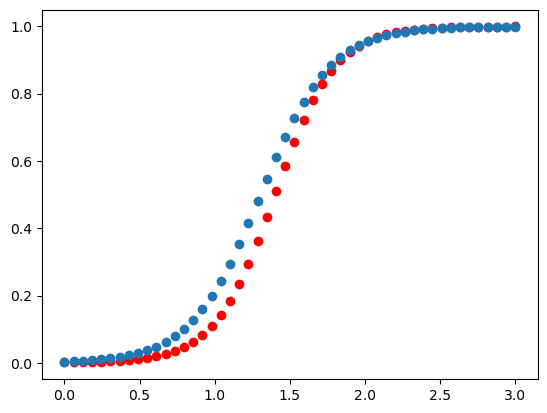

In [57]:
# Perform Gradient Descent
w, b = GradientDescent(percSat)

# The blue curve denotes the sigmoid function as used in the Generator
plt.scatter(xData, [Sigmoid(Func(ele, target_w, target_b)) for ele in xData], color = 'red')
plt.scatter(xData, [Sigmoid(Func(ele, w, b)) for ele in xData])
plt.show()

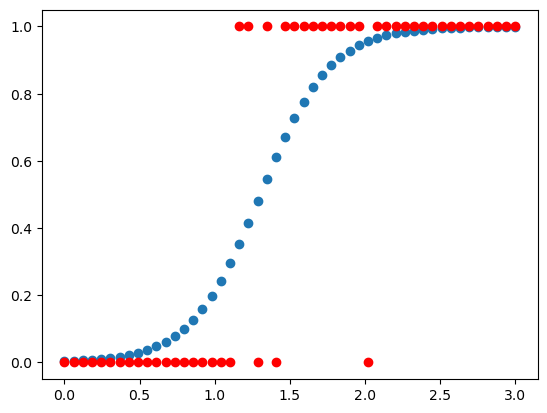

In [58]:
# This plots training dataset along with fit

plt.scatter(xData, [Sigmoid(Func(ele, w, b)) for ele in xData])
plt.scatter(xData, yData, color = 'red')
plt.show()